# Author: Abeeb Adekunle Garba

# Scenario 1 and 2: Creating a network using network csv-files

In [1]:
pip install contextily

  Using cached contextily-1.6.2-py3-none-any.whl.metadata (2.9 kB)
  Using cached geopy-2.4.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached mercantile-1.2.1-py3-none-any.whl.metadata (4.8 kB)
Using cached contextily-1.6.2-py3-none-any.whl (17 kB)
Using cached geopy-2.4.1-py3-none-any.whl (125 kB)
Using cached mercantile-1.2.1-py3-none-any.whl (14 kB)
   ---------------------------------------- 0.0/25.4 MB ? eta -:--:--
   ------ --------------------------------- 4.2/25.4 MB 20.9 MB/s eta 0:00:02
   ---------- ----------------------------- 6.8/25.4 MB 17.5 MB/s eta 0:00:02
   --------------- ------------------------ 10.0/25.4 MB 15.9 MB/s eta 0:00:01
   -------------------- ------------------- 12.8/25.4 MB 15.2 MB/s eta 0:00:01
   ------------------------ --------------- 15.7/25.4 MB 14.8 MB/s eta 0:00:01
   ----------------------------- ---------- 18.9/25.4 MB 14.7 MB/s eta 0:00:01
   ---------------------------------- ----- 22.0/25.4 MB 15.0 MB/s eta 0:00:01
   -------------------

In [19]:
%matplotlib inline

In [20]:
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.constants import bar
import plotly.graph_objects as go

import GasNetSim as gns

## Simulating the West Africa - Europe Gas Network

In [21]:
network_case = 2
network_file_folder = Path(f'./scenario{network_case}')

In [22]:
import pandas as pd

In [23]:
pd.read_csv(network_file_folder/f"{network_case}nodes.csv", sep=";")

node_index  pressure_pa  flow_sm3_per_s  flow_MW  altitude_m  \
0            1          NaN        1.000000      NaN          75   
1            2          NaN        1.000000      NaN           0   
2            3          NaN        1.000000      NaN           8   
3            4          NaN        1.000000      NaN          11   
4            5          NaN        1.000000      NaN           0   
..         ...          ...             ...      ...         ...   
73          74          NaN       12.506881      NaN         314   
74          75          NaN        1.000000      NaN         123   
75          76          NaN       13.042938      NaN         331   
76          77          NaN       18.328671      NaN         306   
77          78          NaN        5.147099      NaN         191   

    temperature_k gas_composition node_type   flow_type  longitude   latitude  \
0             NaN        HYDROGEN       NaN  volumetric   3.281849   6.717337   
1             NaN        HYDROGEN       NaN  volumetric   2.892813   4.963501   
2             NaN        HYDROGEN       NaN  volumetric   2.433333   6.366667   
3             NaN        HYDROGEN       NaN  volumetric   1.222778   6.131944   
4             NaN        HYDROGEN       NaN  volumetric   1.633316   4.758622   
..            ...             ...       ...         ...        ...        ...   
73            NaN        HYDROGEN       NaN  volumetric   2.210086  10.450529   
74            NaN        HYDROGEN       NaN  volumetric   1.780760   6.952573   
75            NaN        HYDROGEN       NaN  volumetric  -6.095068   8.323104   
76            NaN        HYDROGEN       NaN  volumetric  -3.567609   8.906418   
77            NaN        HYDROGEN       NaN  volumetric  -5.535289   6.273639   

    remarks  Unnamed: 12  01h2withwater  02h2withwater  04h2withwater  \
0       NaN          NaN       1.000000       1.000000       1.000000   
1       NaN          NaN       1.000000       1.000000       1.000000   
2       NaN          NaN       1.000000       1.000000       1.000000   
3       NaN          NaN       1.000000       1.000000       1.000000   
4       NaN          NaN       1.000000       1.000000       1.000000   
..      ...          ...            ...            ...            ...   
73      NaN          NaN      10.428883      20.857766      41.715532   
74      NaN          NaN       1.000000       1.000000       1.000000   
75      NaN          NaN       6.366071      12.732142      25.464284   
76      NaN          NaN       7.948292      15.896584      31.793168   
77      NaN          NaN       1.927180       3.854360       7.708720   

    10h2withwater   01tpgwha   02tpgwha  
0         1.00000   1.000000   1.000000  
1         1.00000   1.000000   1.000000  
2         1.00000   1.000000   1.000000  
3         1.00000   1.000000   1.000000  
4         1.00000   1.000000   1.000000  
..            ...        ...        ...  
73      104.28883  12.506881  25.013762  
74        1.00000   1.000000   1.000000  
75       63.66071  13.042938  26.085876  
76       79.48292  18.328671  36.657342  
77       19.27180   5.147099  10.294198  

[78 rows x 19 columns]

In [24]:
network = gns.create_network_from_folder(network_file_folder)

In [25]:
total_production_sm3_per_second = 0

for n in network.nodes.values():
    if n.volumetric_flow:
        total_production_sm3_per_second += n.volumetric_flow

total_production_bcm_per_year = total_production_sm3_per_second * 60 * 60 * 24 * 365 / 1e9


total_production_bcm_per_year

935.9236896664321

In [26]:
target_total_production = 30
scaling_factor = total_production_bcm_per_year / target_total_production
scaling_factor

31.197456322214403

In [27]:
for p in network.pipelines.values():
    p.diameter = 1.23
    p.efficiency = 1
for n in network.nodes.values():
    if n.volumetric_flow:
        n.volumetric_flow = -n.volumetric_flow / scaling_factor

In [28]:
total_production_sm3_per_second = 0

for n in network.nodes.values():
    if n.volumetric_flow:
        total_production_sm3_per_second += n.volumetric_flow

total_production_sm3_per_second

-951.2937595129374

In [29]:
total_production_sm3_per_second * 60 * 60 * 24 * 365 / 1e9

-29.999999999999993

In [30]:
LHV_H2_MJ_per_sm3 = 10.8     
MJ_to_kWh = 0.27778
seconds_per_year = 365 * 24 * 3600

# Energy capacity in GWh/year
energy_GWh_per_year = (total_production_sm3_per_second * 
                       LHV_H2_MJ_per_sm3 * 
                       MJ_to_kWh * 
                       seconds_per_year) / 1e6

print(f"Annual transport capacity: {energy_GWh_per_year:.2f} GWh/year")


Annual transport capacity: -90000.72 GWh/year


In [31]:
network.simulation()

INFO:GasNetSim.components.network:Simulation converges in 31 iterations.


In [32]:
sorted([n.pressure for n in network.nodes.values()])

[7101325.0,
 8170086.87775967,
 8174712.188831335,
 10289401.8223541,
 10290440.064585963,
 12288414.862061102,
 12288509.113324538,
 13566047.12393169,
 13568628.644867918,
 13776703.184225185,
 13779530.989598598,
 14133632.025775583,
 14137044.680721564,
 14142531.719674677,
 14143735.6195194,
 14151081.925157152,
 14157379.073147548,
 14157910.67222883,
 14160657.811336868,
 14161547.985045416,
 14162369.708612915,
 14165420.26456108,
 14167049.655336618,
 14168585.202755634,
 14433077.632350637,
 14464695.475406967,
 14464804.963210098,
 14808901.213335017,
 14811810.326245107,
 14846201.41720095,
 14857302.683354653,
 14859092.462343195,
 15355314.339457327,
 15384944.780993782,
 15385755.620528828,
 15407084.66855239,
 15410563.862928899,
 16075634.16263804,
 16092518.337355375,
 16107365.417389367,
 16115578.536186898,
 16635046.642741095,
 16636662.902013877,
 16840552.28693919,
 16842815.119363666,
 17007913.184932575,
 17009308.348387238,
 17158723.86749564,
 17188115.596483

In [33]:
[p.flow_rate for p in network.pipelines.values()]

[2.792573407112598,
 110.58179893240825,
 0.07608309291038841,
 0.8865285090829421,
 465.2850908070302,
 370.1277754571504,
 0.583234020450583,
 261.845970294569,
 37.21754719827412,
 3.3729360205097216,
 -33.837692878161384,
 -324.8459795161133,
 360.04616253947194,
 3.388800941248429,
 -293.5438709950124,
 316.66065694638655,
 47.43254944967826,
 -32.18313110536594,
 -15.247609221054745,
 -215.21270419448254,
 82.03818478510642,
 -134.41941930814932,
 -12.088985826425311,
 5.913323899962517,
 1.830390742335496,
 -0.14881142197644764,
 -9.341342357514637,
 -97.80733168385731,
 108.37258692828628,
 110.3825748047651,
 -0.2737593973166306,
 -0.11031312464728035,
 1.8547094438890277,
 -352.80219151687135,
 358.86315987667354,
 -0.5876459844223629,
 2.128864362568763,
 329.96548160085507,
 365.03950895181896,
 -0.4009559186796943,
 5.029849440957648,
 -42.35095180603423,
 -380.75121854260993,
 454.867312830968,
 456.2501979423143,
 458.86857691607037,
 365.06591863805596,
 0.4182051174501

In [34]:
sorted([p.flow_rate for p in network.pipelines.values()])

[-380.75121854260993,
 -352.80219151687135,
 -324.8459795161133,
 -293.5438709950124,
 -215.21270419448254,
 -134.41941930814932,
 -97.80733168385731,
 -42.35095180603423,
 -33.837692878161384,
 -32.18313110536594,
 -15.247609221054745,
 -12.088985826425311,
 -9.341342357514637,
 -0.5876459844223629,
 -0.4009559186796943,
 -0.2737593973166306,
 -0.14881142197644764,
 -0.11031312464728035,
 -0.032079669181082494,
 -0.03207756122976245,
 -0.03206951895264411,
 -0.03206872458794539,
 -0.032066548260946244,
 -0.032059431388698226,
 -0.03205797793741455,
 -0.03205348670523551,
 0.07608309291038841,
 0.10771911197105288,
 0.4182051174501033,
 0.583234020450583,
 0.6152010199903799,
 0.8865285090829421,
 0.9183046009964249,
 1.830390742335496,
 1.8547094438890277,
 2.128864362568763,
 2.792573407112598,
 2.8245896824936527,
 3.3729360205097216,
 3.388800941248429,
 5.029849440957648,
 5.913323899962517,
 37.21754719827412,
 47.43254944967826,
 82.03818478510642,
 108.37258692828628,
 110.3825

In [33]:
with open('pressures_sorted_dict_case2.pickle', 'rb') as handle:
    a = pickle.load(handle)

a

{71.01325: 30,
 81.70086877759671: 28,
 81.74712188831336: 29,
 102.89401822354101: 26,
 102.90440064585964: 27,
 122.88414862061101: 25,
 122.88509113324538: 24,
 135.6604712393169: 22,
 135.68628644867917: 23,
 137.76703184225187: 20,
 137.795309895986: 21,
 141.33632025775586: 44,
 141.37044680721564: 43,
 141.42531719674676: 39,
 141.437356195194: 45,
 141.51081925157155: 46,
 141.5737907314755: 19,
 141.5791067222883: 41,
 141.6065781133687: 18,
 141.61547985045416: 53,
 141.62369708612914: 54,
 141.65420264561078: 51,
 141.6704965533662: 52,
 141.68585202755634: 50,
 144.33077632350637: 56,
 144.64695475406967: 16,
 144.648049632101: 17,
 148.0890121333502: 55,
 148.1181032624511: 48,
 148.4620141720095: 49,
 148.57302683354655: 14,
 148.59092462343196: 15,
 153.55314339457328: 58,
 153.84944780993783: 59,
 153.8575562052883: 57,
 154.07084668552392: 12,
 154.105638629289: 13,
 160.75634162638042: 76,
 160.92518337355375: 78,
 161.07365417389366: 10,
 161.155785361869: 11,
 166.3

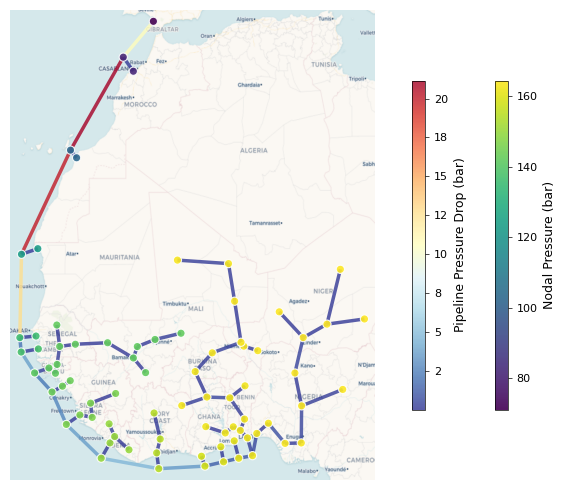

In [17]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.collections import LineCollection
import numpy as np
import contextily as ctx

drop_cmap = plt.colormaps.get_cmap("RdYlBu_r") 
node_cmap = plt.colormaps.get_cmap("viridis")   

node_pressures = {node_id: n.pressure / 1e5 for node_id, n in network.nodes.items()}
pressure_drops = []
segments = []
colors = []

for pid, p in network.pipelines.items():
    start_node, end_node = p.inlet_index, p.outlet_index
    if start_node in node_pressures and end_node in node_pressures:
        p_drop = abs(node_pressures[start_node] - node_pressures[end_node])
        pressure_drops.append(p_drop)
        x = [network.nodes[start_node].longitude, network.nodes[end_node].longitude]
        y = [network.nodes[start_node].latitude,  network.nodes[end_node].latitude]
        segments.append(list(zip(x, y)))
        colors.append(p_drop)

drop_norm = mcolors.Normalize(vmin=min(pressure_drops), vmax=max(pressure_drops))
node_norm = mcolors.Normalize(vmin=min(node_pressures.values()), vmax=max(node_pressures.values()))

def to_web_mercator(lons, lats):
    import pyproj
    proj = pyproj.Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)
    return proj.transform(lons, lats)

lons = np.array([n.longitude for n in network.nodes.values()])
lats = np.array([n.latitude for n in network.nodes.values()])
x_nodes, y_nodes = to_web_mercator(lons, lats)

segments_web = []
for seg in segments:
    xs, ys = zip(*seg)
    xs, ys = to_web_mercator(xs, ys)
    segments_web.append(list(zip(xs, ys)))

fig, ax = plt.subplots(figsize=(6, 5))  

lc = LineCollection(segments_web, cmap=drop_cmap, norm=drop_norm, linewidths=2.5, alpha=0.8)
lc.set_array(np.array(colors))
ax.add_collection(lc)

sc = ax.scatter(
    x_nodes, y_nodes,
    c=[node_pressures[nid] for nid in network.nodes],
    cmap=node_cmap, norm=node_norm,
    s=35, edgecolor="white", linewidth=0.8, 
    alpha=0.9, zorder=5  
)

margin = 100000  
ax.set_xlim(x_nodes.min() - margin, x_nodes.max() + margin)
ax.set_ylim(y_nodes.min() - margin, y_nodes.max() + margin)

ctx.add_basemap(ax, crs="EPSG:3857", source=ctx.providers.CartoDB.Voyager, attribution="")
ax.set_axis_off()
cbar_nodes = fig.colorbar(sc, ax=ax, shrink=0.7, aspect=25, pad=0.02, 
                         format='%.0f')  
cbar_nodes.set_label("Nodal Pressure (bar)", fontsize=9, fontweight='normal')
cbar_nodes.ax.tick_params(labelsize=8, width=0.5, length=3)  
cbar_nodes.outline.set_linewidth(0.5)

cbar_pipes = fig.colorbar(lc, ax=ax, shrink=0.7, aspect=25, pad=0.08,
                         format='%.0f')  
cbar_pipes.set_label("Pipeline Pressure Drop (bar)", fontsize=9, fontweight='normal')
cbar_pipes.ax.tick_params(labelsize=8, width=0.5, length=3)  
cbar_pipes.outline.set_linewidth(0.5)



plt.tight_layout()
plt.savefig("network_static_map_with_basemap_pressureS1.png", dpi=300, bbox_inches="tight")
plt.show()


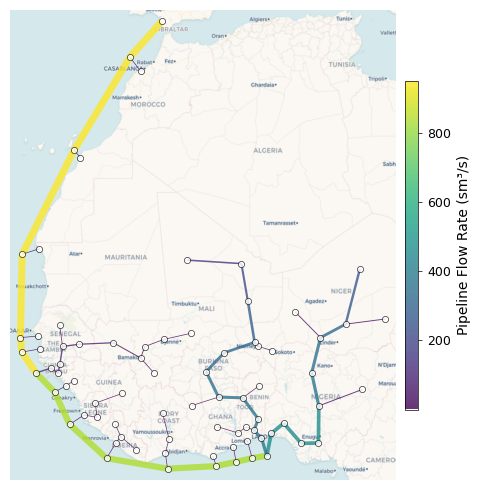

In [68]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.collections import LineCollection
import numpy as np
import contextily as ctx

flow_cmap = plt.colormaps.get_cmap("viridis") 
flow_rates = []
segments = []
colors = []
linewidths = []

for pid, p in network.pipelines.items():
    start_node, end_node = p.inlet_index, p.outlet_index
    if start_node in network.nodes and end_node in network.nodes:
        flow_rate = abs(p.flow_rate)  
        flow_rates.append(flow_rate)
        
        x = [network.nodes[start_node].longitude, network.nodes[end_node].longitude]
        y = [network.nodes[start_node].latitude,  network.nodes[end_node].latitude]
        segments.append(list(zip(x, y)))
        colors.append(flow_rate)
        linewidths.append(flow_rate)

flow_norm = mcolors.Normalize(vmin=min(flow_rates), vmax=max(flow_rates))
min_width, max_width = 0.5, 5.0
width_norm = np.array(linewidths)
width_norm = min_width + (width_norm - min(width_norm)) / (max(width_norm) - min(width_norm)) * (max_width - min_width)

def to_web_mercator(lons, lats):
    import pyproj
    proj = pyproj.Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)
    return proj.transform(lons, lats)

lons = np.array([n.longitude for n in network.nodes.values()])
lats = np.array([n.latitude for n in network.nodes.values()])
x_nodes, y_nodes = to_web_mercator(lons, lats)

segments_web = []
for seg in segments:
    xs, ys = zip(*seg)
    xs, ys = to_web_mercator(xs, ys)
    segments_web.append(list(zip(xs, ys)))

fig, ax = plt.subplots(figsize=(5, 5))

lc = LineCollection(segments_web, cmap=flow_cmap, norm=flow_norm, linewidths=width_norm, alpha=0.8)
lc.set_array(np.array(colors))
ax.add_collection(lc)

ax.scatter(
    x_nodes, y_nodes,
    s=20, color='white', edgecolor='black', linewidth=0.5,
    alpha=0.8, zorder=5
)

margin = 100000
ax.set_xlim(x_nodes.min() - margin, x_nodes.max() + margin)
ax.set_ylim(y_nodes.min() - margin, y_nodes.max() + margin)
ctx.add_basemap(ax, crs="EPSG:3857", source=ctx.providers.CartoDB.Voyager, attribution="")
ax.set_axis_off()
cbar_flow = fig.colorbar(lc, ax=ax, shrink=0.7, aspect=25, pad=0.02,
                        format='%.0f')  
cbar_flow.set_label("Pipeline Flow Rate (sm³/s)", fontsize=10, fontweight='normal')
cbar_flow.ax.tick_params(labelsize=9, width=0.5, length=3)
cbar_flow.outline.set_linewidth(0.5)

plt.tight_layout()
plt.savefig("network_flow_rates_mapS2.png", dpi=300, bbox_inches="tight")
plt.show()